In [102]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 깨짐 방지
plt.rcParams['figure.figsize'] = (10, 8)  # figsize 설정


from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [75]:
df = pd.read_csv("C:\\Users\\shj06\\OneDrive\\바탕 화면\\archive\\pokemon.csv")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [77]:
# Assuming there is an existing DataFrame 'df', we will drop the specified columns
# The columns to be dropped are: 'base_egg_steps', 'base_happiness', 'experience_growth', 'japanese_name', 
# 'pokedex_number', 'weight_kg', 'height_m'

columns_to_drop = ['base_egg_steps', 'base_happiness', 'experience_growth', 
                   'japanese_name', 'pokedex_number', 'weight_kg', 'height_m','capture_rate','classfication']

# Dropping the specified columns from the DataFrame
df1 = df.drop(columns=columns_to_drop)

# Displaying the resulting DataFrame
df1.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,hp,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,45,Bulbasaur,88.1,65,65,45,grass,poison,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,60,Ivysaur,88.1,80,80,60,grass,poison,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,Venusaur,88.1,122,120,80,grass,poison,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,39,Charmander,88.1,60,50,65,fire,NaN,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,58,Charmeleon,88.1,80,65,80,fire,NaN,1,0


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abilities         801 non-null    object 
 1   against_bug       801 non-null    float64
 2   against_dark      801 non-null    float64
 3   against_dragon    801 non-null    float64
 4   against_electric  801 non-null    float64
 5   against_fairy     801 non-null    float64
 6   against_fight     801 non-null    float64
 7   against_fire      801 non-null    float64
 8   against_flying    801 non-null    float64
 9   against_ghost     801 non-null    float64
 10  against_grass     801 non-null    float64
 11  against_ground    801 non-null    float64
 12  against_ice       801 non-null    float64
 13  against_normal    801 non-null    float64
 14  against_poison    801 non-null    float64
 15  against_psychic   801 non-null    float64
 16  against_rock      801 non-null    float64
 1

In [79]:
# 컬럼 명 변경
df1.columns = [
    '능력',
    '상성_벌레',
    '상성_악',
    '상성_드래곤',
    '상성_전기',
    '상성_요정',
    '상성_격투',
    '상성_불',
    '상성_비행',
    '상성_고스트',
    '상성_풀',
    '상성_땅',
    '상성_얼음',
    '상성_노멀',
    '상성_독',
    '상성_에스퍼',
    '상성_바위',
    '상성_강철',
    '상성_물',
    '공격력',
    '스탯_총합',
    '방어',
    '체력',
    '이름',
    '수컷_비율',
    '특수_공격',
    '특수_방어',
    '스피드',
    '타입1',
    '타입2',
    '세대',
    '전설의_포켓몬_여부'
]

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   능력          801 non-null    object 
 1   상성_벌레       801 non-null    float64
 2   상성_악        801 non-null    float64
 3   상성_드래곤      801 non-null    float64
 4   상성_전기       801 non-null    float64
 5   상성_요정       801 non-null    float64
 6   상성_격투       801 non-null    float64
 7   상성_불        801 non-null    float64
 8   상성_비행       801 non-null    float64
 9   상성_고스트      801 non-null    float64
 10  상성_풀        801 non-null    float64
 11  상성_땅        801 non-null    float64
 12  상성_얼음       801 non-null    float64
 13  상성_노멀       801 non-null    float64
 14  상성_독        801 non-null    float64
 15  상성_에스퍼      801 non-null    float64
 16  상성_바위       801 non-null    float64
 17  상성_강철       801 non-null    float64
 18  상성_물        801 non-null    float64
 19  공격력         801 non-null    i

In [81]:
type_mapping = {
    'bug': '벌레',
    'dark': '악',
    'dragon': '드래곤',
    'electric': '전기',
    'fairy': '페어리',
    'fight': '격투',
    'fire': '불',
    'flying': '비행',
    'ghost': '고스트',
    'grass': '풀',
    'ground': '땅',
    'ice': '얼음',
    'normal': '노말',
    'poison': '독',
    'psychic': '에스퍼',
    'rock': '바위',
    'steel': '강철',
    'water': '물'
}

df1['타입1'] = df1['타입1'].map(type_mapping)
df1['타입2'] = df1['타입2'].map(type_mapping)


In [82]:
df1['타입1']

0        풀
1        풀
2        풀
3        불
4        불
      ... 
796     강철
797      풀
798      악
799    에스퍼
800     강철
Name: 타입1, Length: 801, dtype: object

In [83]:
df1['타입2'] = df1['타입2'].fillna('없음')

In [84]:
df1['타입2']

0        독
1        독
2        독
3       없음
4       없음
      ... 
796     비행
797     강철
798    드래곤
799     없음
800    페어리
Name: 타입2, Length: 801, dtype: object

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   능력          801 non-null    object 
 1   상성_벌레       801 non-null    float64
 2   상성_악        801 non-null    float64
 3   상성_드래곤      801 non-null    float64
 4   상성_전기       801 non-null    float64
 5   상성_요정       801 non-null    float64
 6   상성_격투       801 non-null    float64
 7   상성_불        801 non-null    float64
 8   상성_비행       801 non-null    float64
 9   상성_고스트      801 non-null    float64
 10  상성_풀        801 non-null    float64
 11  상성_땅        801 non-null    float64
 12  상성_얼음       801 non-null    float64
 13  상성_노멀       801 non-null    float64
 14  상성_독        801 non-null    float64
 15  상성_에스퍼      801 non-null    float64
 16  상성_바위       801 non-null    float64
 17  상성_강철       801 non-null    float64
 18  상성_물        801 non-null    float64
 19  공격력         801 non-null    i

In [86]:
df1.shape

(801, 32)

In [87]:
# 결측치
df1.isnull().sum()

능력             0
상성_벌레          0
상성_악           0
상성_드래곤         0
상성_전기          0
상성_요정          0
상성_격투          0
상성_불           0
상성_비행          0
상성_고스트         0
상성_풀           0
상성_땅           0
상성_얼음          0
상성_노멀          0
상성_독           0
상성_에스퍼         0
상성_바위          0
상성_강철          0
상성_물           0
공격력            0
스탯_총합          0
방어             0
체력             0
이름             0
수컷_비율         98
특수_공격          0
특수_방어          0
스피드            0
타입1           28
타입2            0
세대             0
전설의_포켓몬_여부     0
dtype: int64

In [88]:
df1.head()

,능력,상성_벌레,상성_악,상성_드래곤,상성_전기,상성_요정,상성_격투,상성_불,상성_비행,상성_고스트,...,체력,이름,수컷_비율,특수_공격,특수_방어,스피드,타입1,타입2,세대,전설의_포켓몬_여부
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,45,Bulbasaur,88.1,65,65,45,풀,독,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,60,Ivysaur,88.1,80,80,60,풀,독,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,Venusaur,88.1,122,120,80,풀,독,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,39,Charmander,88.1,60,50,65,불,없음,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,58,Charmeleon,88.1,80,65,80,불,없음,1,0


In [89]:
# Filtering the columns that start with "상성_"
type_effectiveness_cols = [col for col in df1.columns if col.startswith("상성_")]

# Calculating the sum of these columns for each row
df1['weakness_score'] = df1[type_effectiveness_cols].sum(axis=1)

# Extracting the 'score' and '이름' (name) columns
score_name_df = df1[["이름", "weakness_score"]]

score_name_df

,이름,weakness_score
0,Bulbasaur,19.25
1,Ivysaur,19.25
2,Venusaur,19.25
3,Charmander,18.00
4,Charmeleon,18.00
...,...,...
796,Celesteela,13.50
797,Kartana,16.25
798,Guzzlord,21.00
799,Necrozma,20.00


In [90]:
df = score_name_df.sort_values(by="weakness_score", ascending=True)

In [91]:
df.head(20)

,이름,weakness_score
800,Magearna,13.25
706,Klefki,13.25
302,Mawile,13.25
796,Celesteela,13.50
226,Skarmory,13.50
680,Aegislash,14.25
679,Doublade,14.25
678,Honedge,14.25
482,Dialga,14.25
394,Empoleon,14.50


In [92]:
df.tail(20)

,이름,weakness_score
102,Exeggutor,24.00
73,Geodude,24.25
245,Larvitar,24.25
463,Rhyperior,24.25
111,Rhydon,24.25
74,Graveler,24.25
75,Golem,24.25
246,Pupitar,24.25
110,Rhyhorn,24.25
94,Onix,24.25


In [93]:
score_name_df

,이름,weakness_score
0,Bulbasaur,19.25
1,Ivysaur,19.25
2,Venusaur,19.25
3,Charmander,18.00
4,Charmeleon,18.00
...,...,...
796,Celesteela,13.50
797,Kartana,16.25
798,Guzzlord,21.00
799,Necrozma,20.00


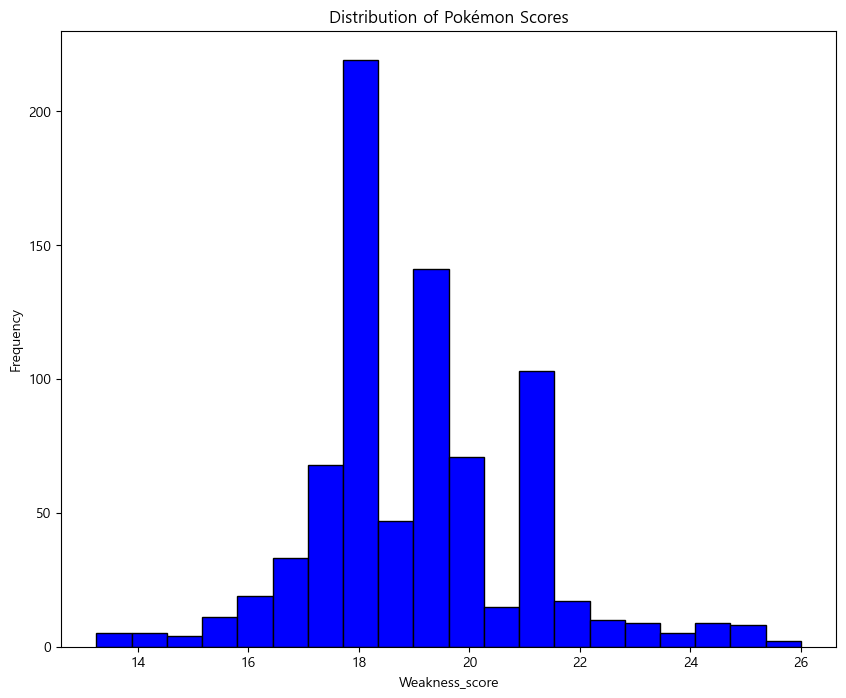

Overall our best score is 13.25  and our worst score is  26.0


In [95]:
import matplotlib.pyplot as plt

# Extracting the 'score' column
x = score_name_df["weakness_score"]

# Plotting the histogram
plt.hist(x, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Pokémon Scores')
plt.xlabel('Weakness_score')
plt.ylabel('Frequency')
plt.show()

# Printing the best and worst score
best_score = min(x)
worst_score = max(x)
print("Overall our best score is", str(best_score), " and our worst score is ", str(worst_score))


In [96]:
#list the pokemon with the highest score
print(score_name_df[score_name_df["weakness_score"] == 13.25]["이름"])

302      Mawile
706      Klefki
800    Magearna
Name: 이름, dtype: object


In [97]:
# Extracting Type 1 and Type 2 for Pokémon named 'Amaura' and 'Aurorus' from the original DataFrame
selected_pokemon = df1[df1["이름"].isin(["Mawile", "Klefki","Magearna"])]

# Extracting relevant information
type_info = selected_pokemon[["이름", "타입1", "타입2"]]

type_info

,이름,타입1,타입2
302,Mawile,강철,페어리
706,Klefki,강철,페어리
800,Magearna,강철,페어리


위의 포켓몬은 모두 강철과 요정의 타입 조합을 가지고 있습니다. 강철은 보통, 풀, 얼음, 비행, 초능력, 벌레, 바위, 고스트, 드래곤, 암흑, 강철, 요정에 강하기 때문에 이 조합은 인상적인 조합입니다. 이 유형 조합에 요정을 추가하면 강철의 격투 약점이 무효화되고 벌레, 암흑, 용에 대한 강점이 증가합니다. 이렇게 하면 땅과 화염에 대한 위크니스만 남습니다.

In [98]:
#list the pokemon with the lowest score
print(score_name_df[score_name_df["weakness_score"] == 26]["이름"])

697     Amaura
698    Aurorus
Name: 이름, dtype: object


In [99]:
# Extracting Type 1 and Type 2 for Pokémon named 'Amaura' and 'Aurorus' from the original DataFrame
selected_pokemon = df1[df1["이름"].isin(["Amaura", "Aurorus"])]

# Extracting relevant information
type_info = selected_pokemon[["이름", "타입1", "타입2"]]

type_info

,이름,타입1,타입2
697,Amaura,바위,얼음
698,Aurorus,바위,얼음


위의 두포켓몬은 바위와 얼음 조합을 가지고있습니다. 바위는 물,풀, 격투, 땅 , 강철에 강하고
노말, 불꽃, 비행 약합니다.또한 얼음이 추가되면 전투,바위,강철에대한 약점이 증가합니다. 또한 불에 두배로 약합니다. 

In [72]:
#cluster analysis 

위의 분석에서 우리는 어떤 포켓몬 유형이 가장 강하고 약한지를 알아냈습니다. 여기서 조금더 나아가 군집분석을 통해 어떤 유형조합이 서로 가장 유사한지 알아봅시다! 
이렇게 하면팀을 구성할때 어떤 포켓몬을 선택하여 할지 더 잘 이해할수있습니다. 

In [100]:
#k-means clustering

In [214]:
#let's do a cluster analysis on each pokemon

kmeans = KMeans(
    init="random",
    n_clusters=8,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(df1[type_effectiveness_cols])

KMeans(init='random', n_init=10, random_state=42)

In [217]:
#analyze the output
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
kmeans.cluster_centers_

# The number of iterations required to converge
print(kmeans.n_iter_)

# first 5 predicted labels
print(kmeans.labels_[:5])

2660.1809767330606
6
[2 2 2 4 4]


In [218]:
# here we can use the elbow method to find the optimal number of clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
# Python’s dictionary unpacking operator (**)
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df1[type_effectiveness_cols])
    sse.append(kmeans.inertia_)

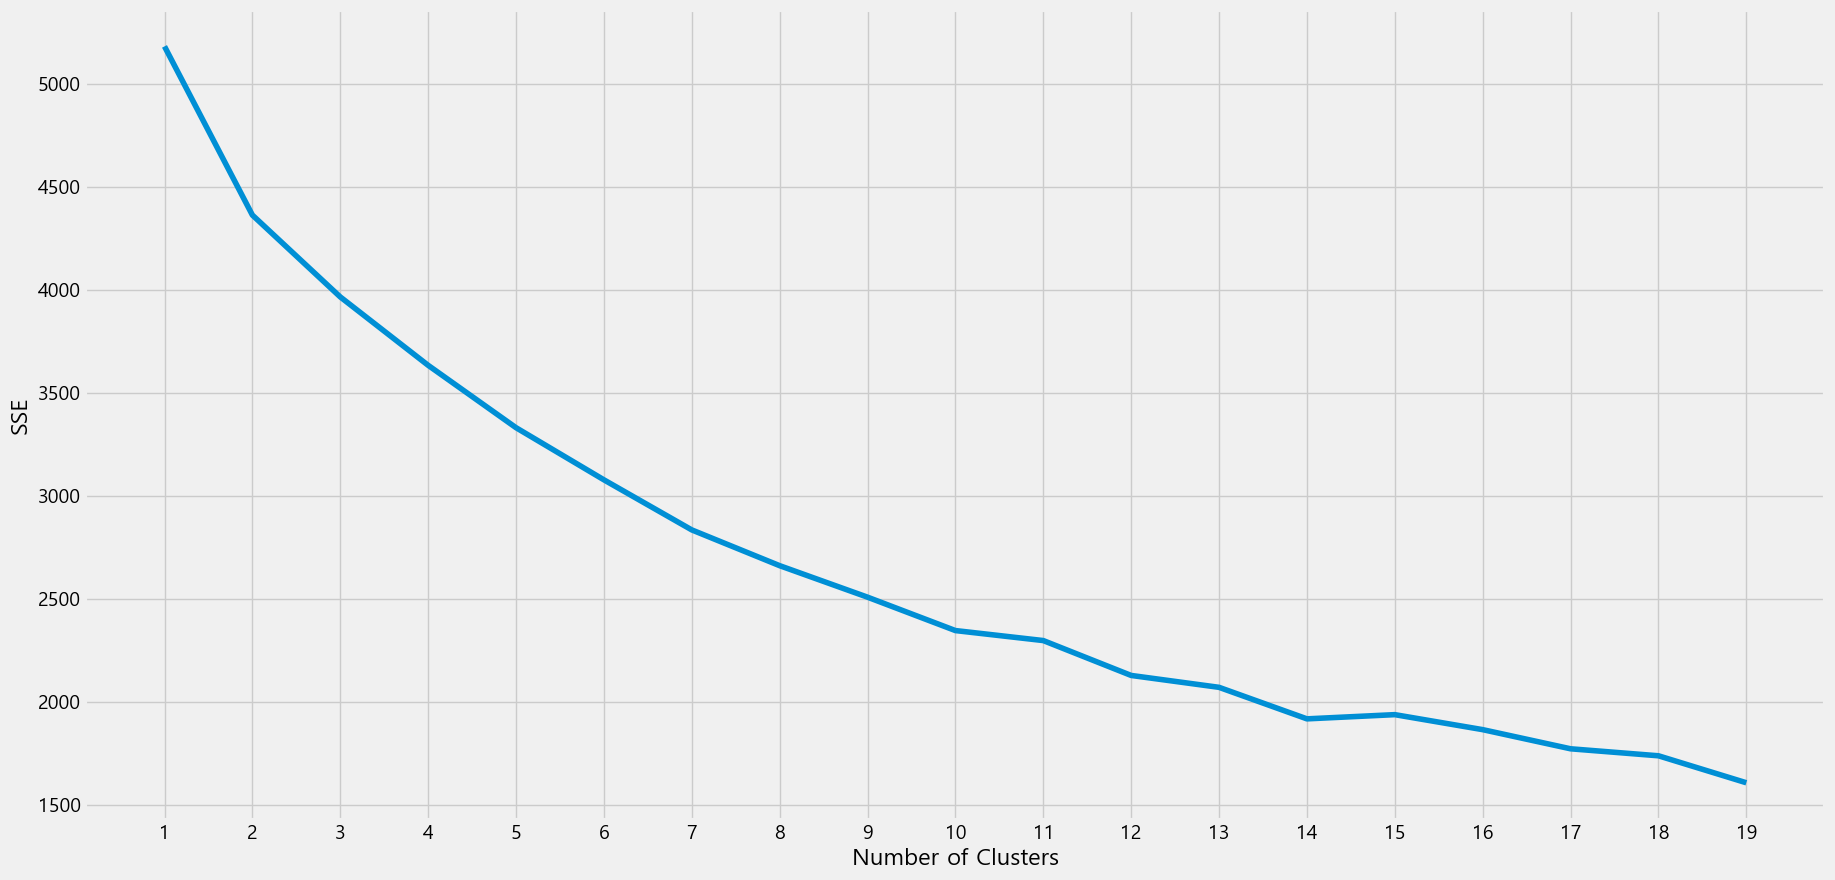

In [219]:
plt.style.use("fivethirtyeight") 
plt.plot(range(1, 20), sse) 
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [184]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
scaled_features = df1[type_effectiveness_cols]

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

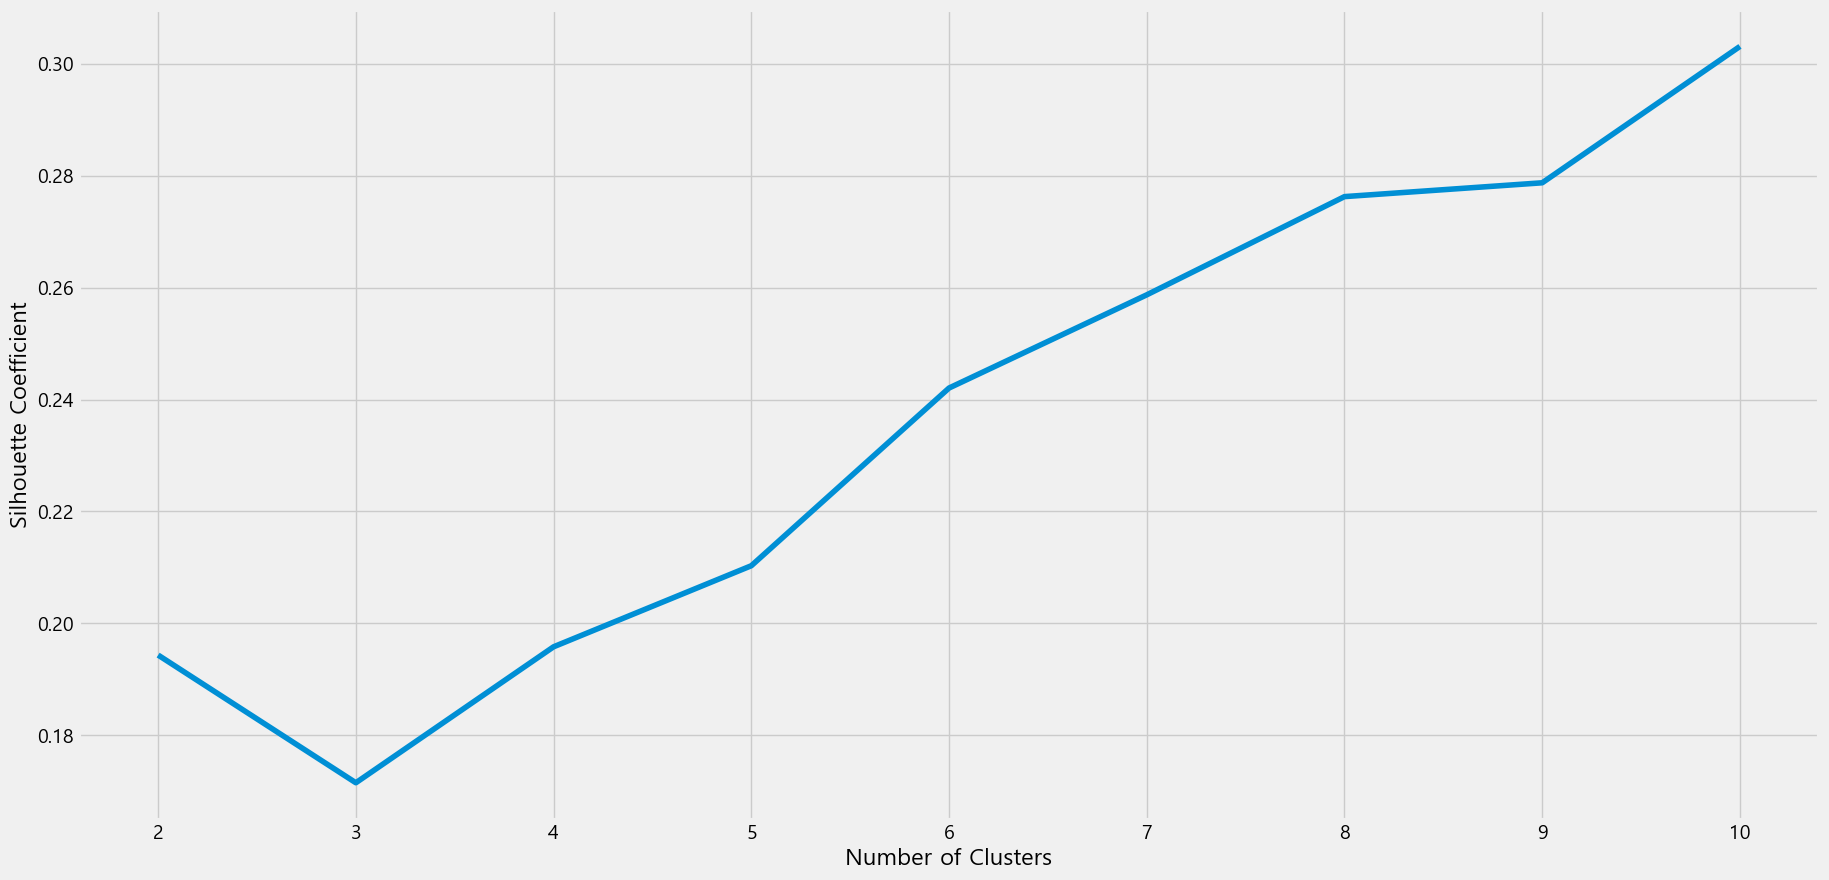

In [185]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [186]:
#hierarchical clustering 

In [187]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import scale

In [188]:
#Configure the output
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams["figure.figsize"] =20,10

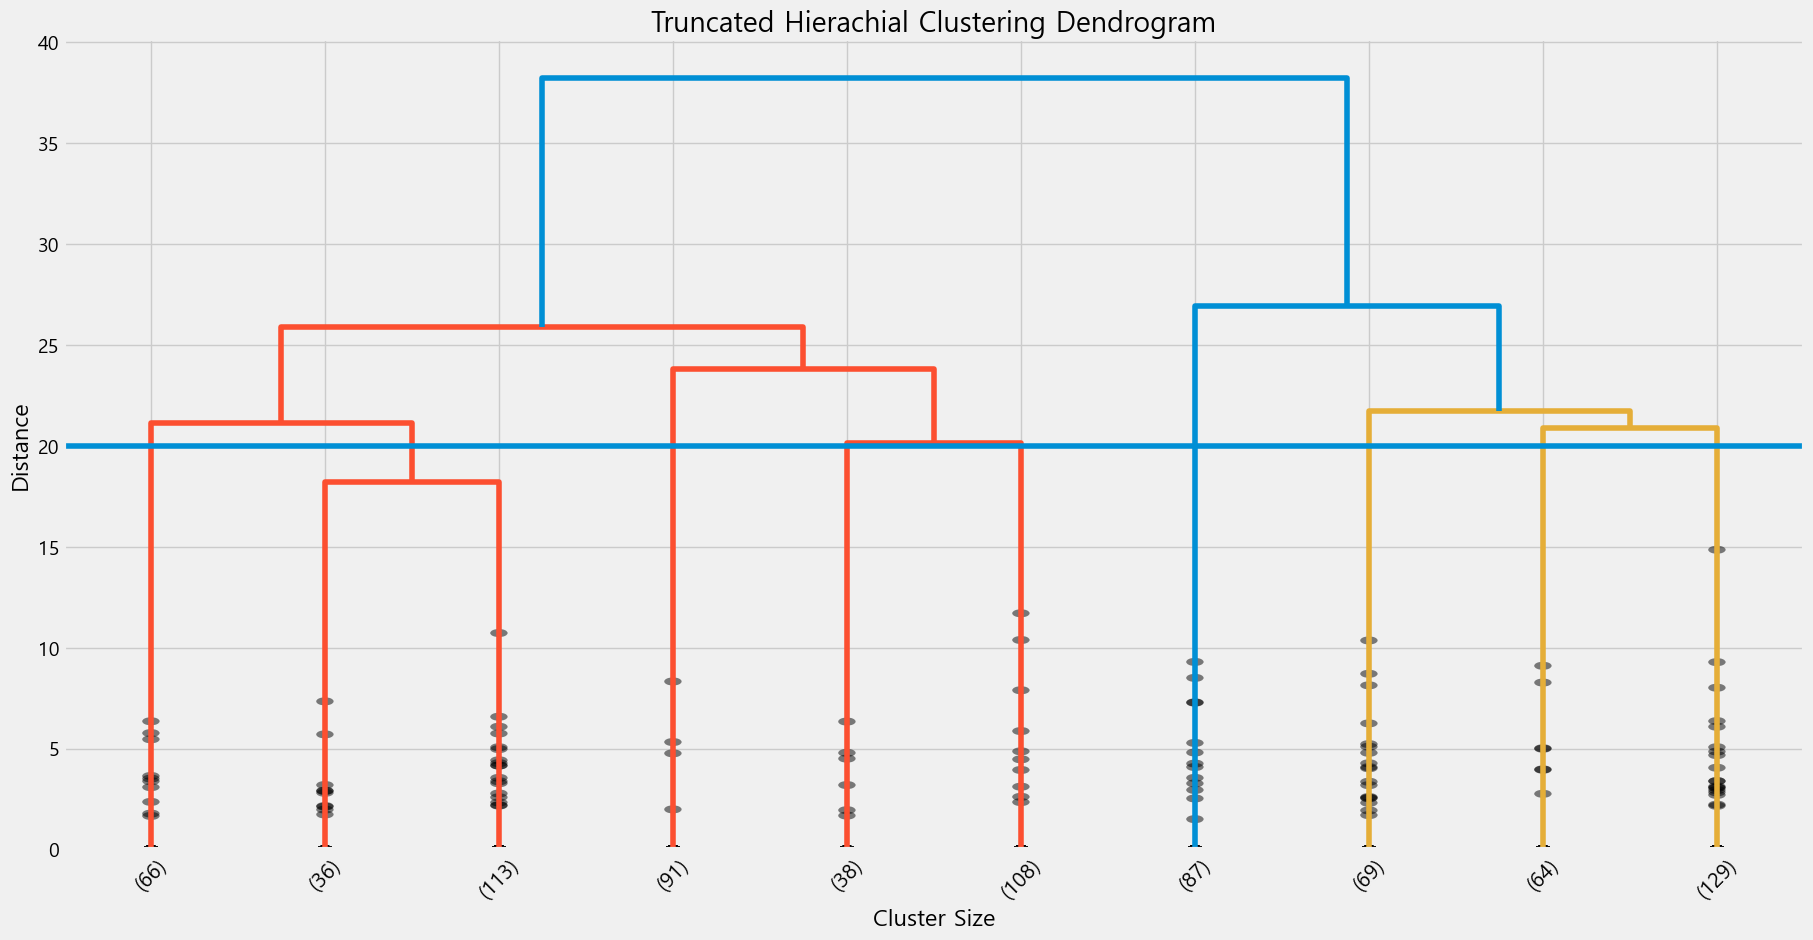

In [189]:
z = linkage(scaled_features,"ward")

#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =10, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=20)
plt.show()

#analyzing clusters 
더 나아가서 저희는 계층적 군집분석 결과와 함께 6개의 클러스터를 선택했습니다. 이렇게 한 이유는 트레이너가 자신의 팀에 7개의 포켓몬을 선택할수 있기때문입니다. 따라서 군집분석을 통해 이질적인 타입 조합을 가진 포켓몬 5마리와 트레이너가 추가로 선택할수 있는 포켓몬ㄴ한마리를 선택할수있습니다ㅣ 

In [190]:
#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

In [191]:
#let's do a cluster analysis on each pokemon

kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(df1[type_effectiveness_cols])

# attach predicted labels to our dataset
df1["clusters"] = kmeans.labels_

#histogram of clusters
fig = px.histogram(df1, x="clusters")
fig.update_layout(
    title_text='Number of Pokemon in Each Cluster', # title of plot
    xaxis_title_text='Cluster', # xaxis label
    yaxis_title_text='Number of Pokemon', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
)
fig.show()

이제 각 포켓몬을 클러스터에 할당했으니 각 클러스터의 약점과 강점을 찾아보겠습니다.

In [220]:
grid = []
for j in type_effectiveness_cols:
    typ = []
    for i in range(0,5):
        typ.append(df1[df1["clusters"] == i][j].mean())
    grid.append(typ)

In [221]:
grid1 = pd.DataFrame(grid)
grid2 = grid1.transpose()
grid2.columns = type_effectiveness_cols
# grid2["clusters"] = [1,2,3,4,5,6,7,8]
grid2

,상성_벌레,상성_악,상성_드래곤,상성_전기,상성_요정,상성_격투,상성_불,상성_비행,상성_고스트,상성_풀,상성_땅,상성_얼음,상성_노멀,상성_독,상성_에스퍼,상성_바위,상성_강철,상성_물
0,1.036260,0.884542,1.083969,1.214695,1.374046,1.534351,0.814885,1.087786,0.652672,1.498092,1.068702,0.965649,0.967557,0.961832,0.998092,0.980916,0.933206,0.820611
1,1.507812,1.007812,0.914062,0.636719,0.984375,0.785156,2.226562,2.093750,1.042969,0.453125,0.566406,1.777344,0.921875,1.582031,1.089844,1.269531,1.011719,0.634766
2,0.536036,1.036036,1.027027,1.864865,0.995495,0.585586,1.157658,1.256757,0.815315,0.486486,0.148649,1.806306,0.954955,0.891892,1.063063,2.360360,0.959459,1.054054
3,1.366337,1.900990,0.910891,0.990099,1.009901,0.386139,1.054455,0.975248,2.000000,1.039604,1.202970,0.965347,0.628713,0.779703,0.636139,0.995050,1.004950,1.079208
4,0.683417,0.899497,0.849246,0.771357,0.792714,1.241206,0.884422,0.826633,0.964824,1.099246,1.954774,0.951005,0.851759,0.748744,1.115578,1.103015,1.033920,1.635678


In [222]:
pts = []
for i in range(0,5):
    df = pd.DataFrame(grid2)
    pts.append(df.iloc[i, :])

In [223]:
#CLUSTER1 

In [224]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=type_effectiveness_cols,y=pts[0], marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Cluster 1 Weakness Chart",
                             xaxis_title="Poke Type", yaxis_title="Damage Multiplyer",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

위의 결과에서 이 클러스터는 풀,격투,요정,전기 약하고 풀, 격투, 땅에는 강하다는 것을 알 수 있습니다. 이 클러스터는 풀, 비행, 요정 또는 이 세 가지를 조합한 타입의 포켓몬으로 구성되어 있습니다. 이 클러스터에 속하는 포켓몬으로는 버터프리, 엑세구터, 미스터마임, 핀서, 심지어 카리자드도 있습니다. 

In [225]:
#run to see 30 pokemon in this cluster
print(df1[df1["clusters"]==0]["이름"].head(30))

6        Squirtle
7       Wartortle
8       Blastoise
18        Rattata
19       Raticate
38     Jigglypuff
39     Wigglytuff
51         Meowth
52        Persian
53        Psyduck
54        Golduck
55         Mankey
56       Primeape
59        Poliwag
60      Poliwhirl
61      Poliwrath
65         Machop
66        Machoke
67        Machamp
85           Seel
86        Dewgong
89       Shellder
90       Cloyster
97         Krabby
98        Kingler
105     Hitmonlee
106    Hitmonchan
107     Lickitung
112       Chansey
114    Kangaskhan
Name: 이름, dtype: object


In [226]:
#CLUSTER2 

In [227]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=type_effectiveness_cols,y=pts[1], marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Cluster 2 Weakness Chart",
                             xaxis_title="Poke Type", yaxis_title="Damage Multiplyer",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

이 클러스터에서는 불,비행,얼음에 약하고, 풀, 땅, 전기에 강합니다.
이클러스터에는 풀 타입의 공격에 약합니다. 이 클러스터 속하는 포켓몬으로 

In [228]:
#run to see 30 pokemon in this cluster
print(df1[df1["clusters"]==1]["이름"].head(30))

0       Bulbasaur
1         Ivysaur
2        Venusaur
9        Caterpie
10        Metapod
42         Oddish
43          Gloom
44      Vileplume
45          Paras
46       Parasect
68     Bellsprout
69     Weepinbell
70     Victreebel
101     Exeggcute
102     Exeggutor
113       Tangela
126        Pinsir
151     Chikorita
152       Bayleef
153      Meganium
181     Bellossom
186        Hoppip
187      Skiploom
188      Jumpluff
190       Sunkern
191      Sunflora
203        Pineco
204    Forretress
211        Scizor
213     Heracross
Name: 이름, dtype: object


In [229]:
#cluster3

In [230]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=type_effectiveness_cols,y=pts[2], marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Cluster 3 Weakness Chart",
                             xaxis_title="Poke Type", yaxis_title="Damage Multiplyer",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

In [231]:
#run to see 30 pokemon in this cluster
print(df1[df1["clusters"]==2]["이름"].head(30))

5       Charizard
11     Butterfree
12         Weedle
13         Kakuna
14       Beedrill
15         Pidgey
16      Pidgeotto
17        Pidgeot
20        Spearow
21         Fearow
40          Zubat
41         Golbat
47        Venonat
48       Venomoth
82     Farfetch'd
83          Doduo
84         Dodrio
122       Scyther
129      Gyarados
141    Aerodactyl
143      Articuno
144        Zapdos
145       Moltres
148     Dragonite
162      Hoothoot
163       Noctowl
164        Ledyba
165        Ledian
166      Spinarak
167       Ariados
Name: 이름, dtype: object


In [232]:
#cluster4

In [233]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=type_effectiveness_cols,y=pts[3], marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Cluster 4 Weakness Chart",
                             xaxis_title="Poke Type", yaxis_title="Damage Multiplyer",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

In [234]:
#run to see 30 pokemon in this cluster
print(df1[df1["clusters"]==3]["이름"].head(30))

62           Abra
63        Kadabra
64       Alakazam
78       Slowpoke
79        Slowbro
91         Gastly
92        Haunter
93         Gengar
95        Drowzee
96          Hypno
120       Starmie
121      Mr. Mime
123          Jynx
149        Mewtwo
150           Mew
195        Espeon
198      Slowking
199    Misdreavus
200         Unown
201     Wobbuffet
237      Smoochum
279         Ralts
280        Kirlia
281     Gardevoir
291      Shedinja
301       Sableye
306      Meditite
307      Medicham
324        Spoink
325       Grumpig
Name: 이름, dtype: object


In [235]:
#cluster5

In [236]:
fig_country = go.Figure()
fig_country.add_trace(go.Bar(x=type_effectiveness_cols,y=pts[4], marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

fig_country.update_layout(title="Cluster 5 Weakness Chart",
                             xaxis_title="Poke Type", yaxis_title="Damage Multiplyer",title_x=0.5, paper_bgcolor="mintcream",
                             title_font_size=20)
fig_country.show()

In [237]:
#run to see 30 pokemon in this cluster
print(df1[df1["clusters"]==4]["이름"].head(30))

3     Charmander
4     Charmeleon
22         Ekans
23         Arbok
24       Pikachu
25        Raichu
26     Sandshrew
27     Sandslash
28      Nidoran♀
29      Nidorina
30     Nidoqueen
31      Nidoran♂
32      Nidorino
33      Nidoking
34      Clefairy
35      Clefable
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
57     Growlithe
58      Arcanine
71     Tentacool
72    Tentacruel
73       Geodude
74      Graveler
75         Golem
76        Ponyta
77      Rapidash
80     Magnemite
Name: 이름, dtype: object


결론적으로 포켓몬 데이터 세트를 사용하여 포켓몬 타입과 그 조합을 더 잘 이해할 수 있었습니다. 먼저 타입 매치업 점수에서 총 점수를 계산하여 가장 약한 포켓몬과 가장 강한 포켓몬 타입 조합을 찾았습니다. 그런 다음 K-Means 군집 분석을 사용하여 비슷한 유형 조합을 그룹화하여 가장 유사한 유형을 더 잘 이해하고 포켓몬 팀을 선택하는 데 도움이 되도록 했습니다. 

모델링을 통해서 포켓몬 상성에 맞는 최고 조합의  포켓몬예측 모델을 진행할예정이다. 